In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [13]:
Customer_df=pd.read_csv("Customer.csv")
Customer_df

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [14]:
pro_cat_info_df=pd.read_csv("prod_cat_info.csv")
pro_cat_info_df

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [15]:
Transactions_df=pd.read_csv("Transactions.csv")
Transactions_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly

In [31]:
customer_transactions_df = Customer_df.merge(Transactions_df,left_on="customer_Id" ,right_on="cust_id", how="inner")
customer_final_df = customer_transactions_df.merge(pro_cat_info_df, on="prod_cat_code", how="left")
customer_final_df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,12,Academic
99289,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,10,Non-Fiction
99290,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,11,Children
99291,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,Books,3,Comics


2. Prepare a summary report for the merged data set\
    a.Get the column names and their corresponding data types\
    b.Top/Bottom 10 observations

In [33]:
column_data_types = customer_final_df.dtypes
print("Column Names and Data Types:")
column_data_types

Column Names and Data Types:


customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [35]:
customer_final_df.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,6,DIY
6,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,1,Mens
7,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,Bags,4,Women
8,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,1,Mens
9,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,Bags,4,Women


In [36]:
customer_final_df.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99283,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.58,1984.58,MBR,Footwear,4,Kids
99284,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.92,3871.92,e-Shop,Footwear,1,Mens
99285,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.92,3871.92,e-Shop,Footwear,3,Women
99286,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.92,3871.92,e-Shop,Footwear,4,Kids
99287,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,Books,7,Fiction
99288,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,Books,12,Academic
99289,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,Books,10,Non-Fiction
99290,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,Books,11,Children
99291,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,Books,3,Comics
99292,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.70,3248.70,e-Shop,Books,6,DIY


 c.  “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [41]:
import numpy as np
def quartiles(column):
    return np.percentile(column, [0, 25, 50, 75, 100])
continuous_variables = customer_final_df.select_dtypes(include=['int64', 'float64'])
five_number_summary = continuous_variables.apply(quartiles)
print("Five-Number Summary for Continuous Variables:")

five_number_summary


Five-Number Summary for Continuous Variables:


,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
0,266783.0,NaN,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
1,268956.0,NaN,2.492150e+10,268956.0,4.0,3.0,1.0,313.0,98.280,762.450,4.0
2,270982.0,NaN,5.011083e+10,270982.0,7.0,5.0,3.0,713.0,199.920,1761.370,7.0
3,273120.0,NaN,7.528121e+10,273120.0,10.0,5.0,4.0,1109.0,366.975,3585.725,10.0
4,275265.0,NaN,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,12.0


d. Frequency tables for all the categorical variables

In [42]:
categorical_variables = customer_final_df.select_dtypes(include=['object'])
frequency_tables = {}
for column in categorical_variables.columns:
    frequency_tables[column] = customer_final_df[column].value_counts()
    
print("Frequency Tables for Categorical Variables:")
for column, table in frequency_tables.items():
    print("\n", column, ":\n", table)


Frequency Tables for Categorical Variables:

 DOB :
 DOB
27-12-1988    156
17-09-1982    134
25-02-1974    126
18-11-1991    114
09-06-1970    107
             ... 
23-08-1982      2
21-07-1986      2
18-11-1970      2
02-08-1991      2
08-05-1981      2
Name: count, Length: 3987, dtype: int64

 Gender :
 Gender
M    51051
F    48202
Name: count, dtype: int64

 tran_date :
 tran_date
25-08-2012    153
13-07-2011    144
25-09-2011    144
3/2/2014      142
21-12-2013    141
             ... 
23-02-2014     11
24-02-2014     10
27-02-2014      5
21-02-2014      5
28-02-2014      3
Name: count, Length: 1129, dtype: int64

 Store_type :
 Store_type
e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: count, dtype: int64

 prod_cat :
 prod_cat
Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: count, dtype: int64

 prod_subcat :
 prod

3.  Generate histograms for all continuous variables and frequency bars for categorical variables

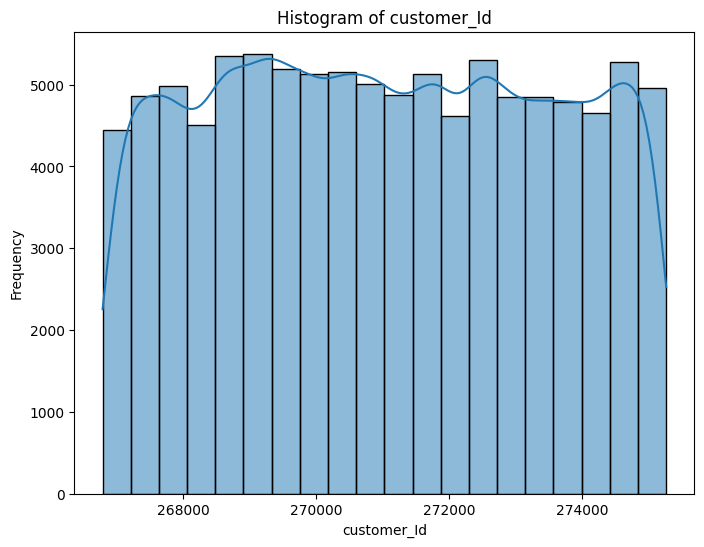

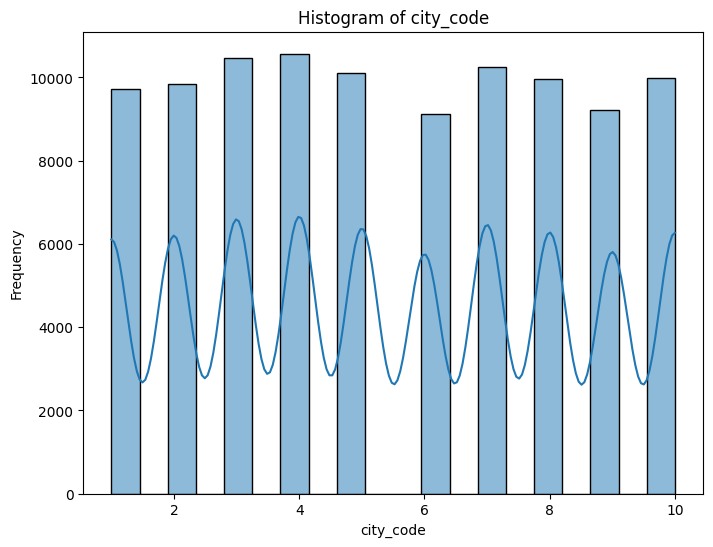

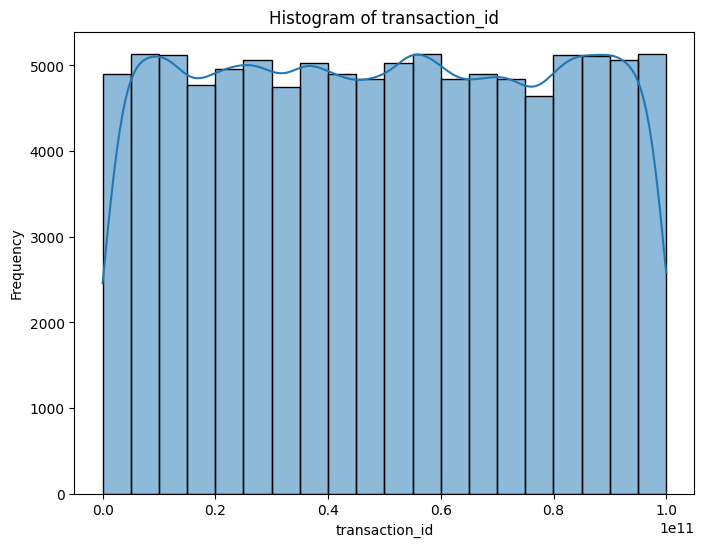

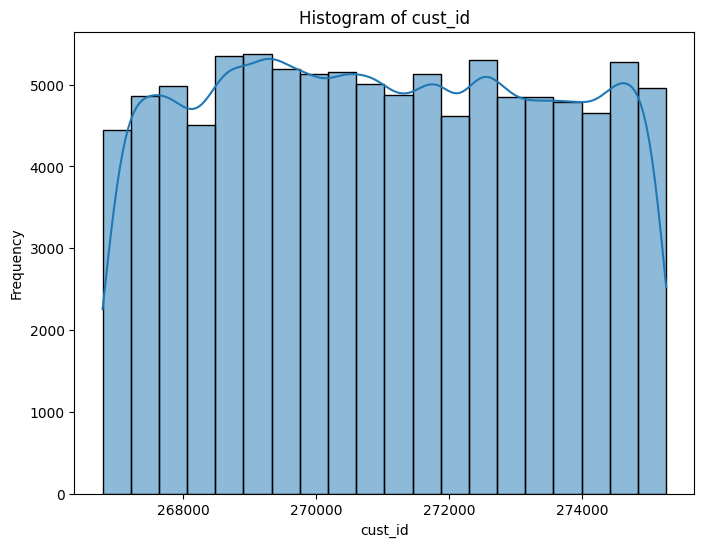

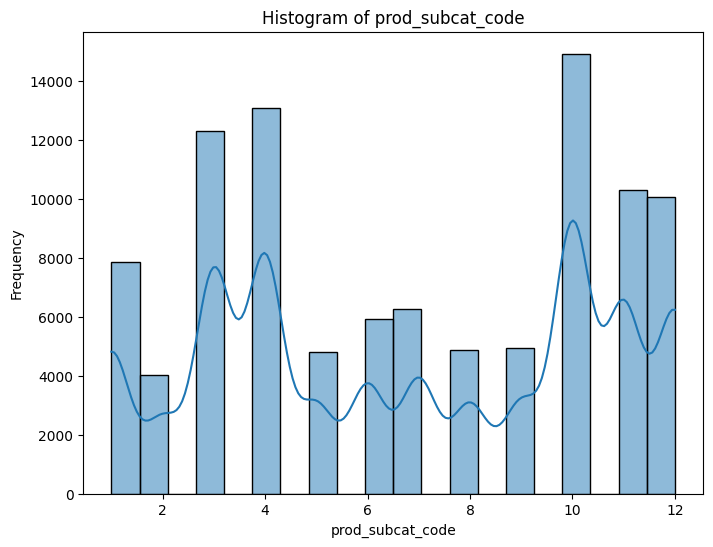

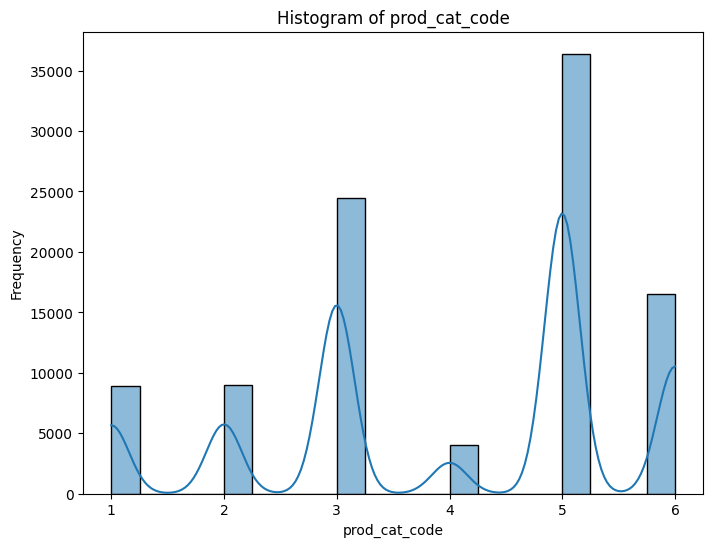

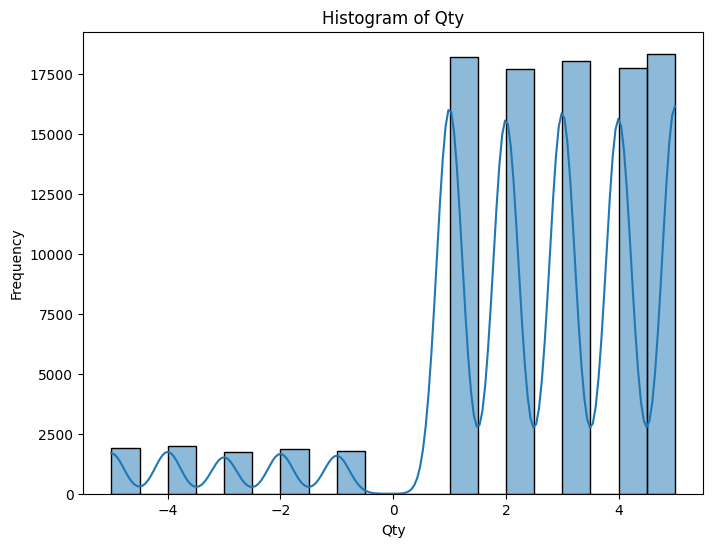

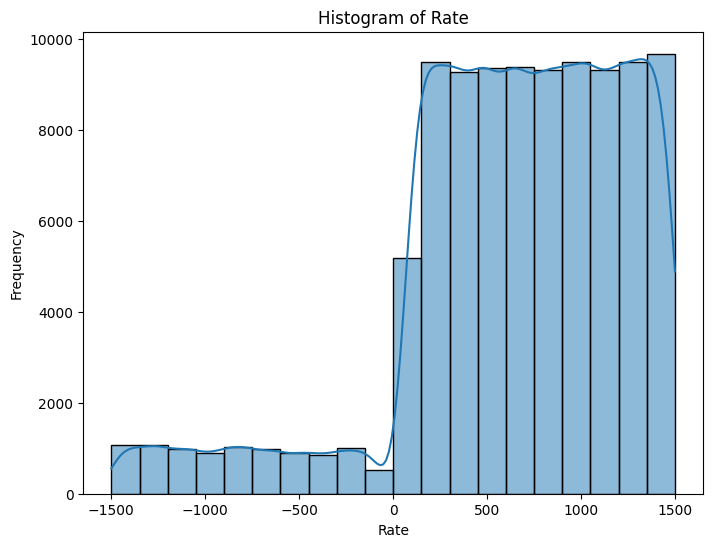

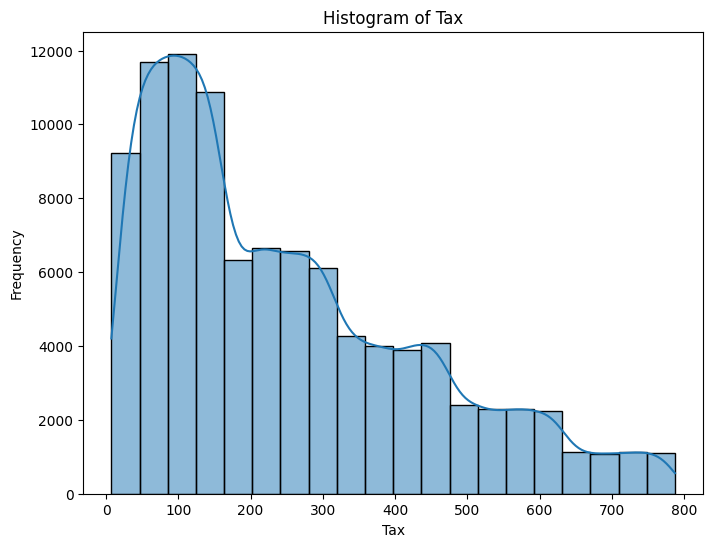

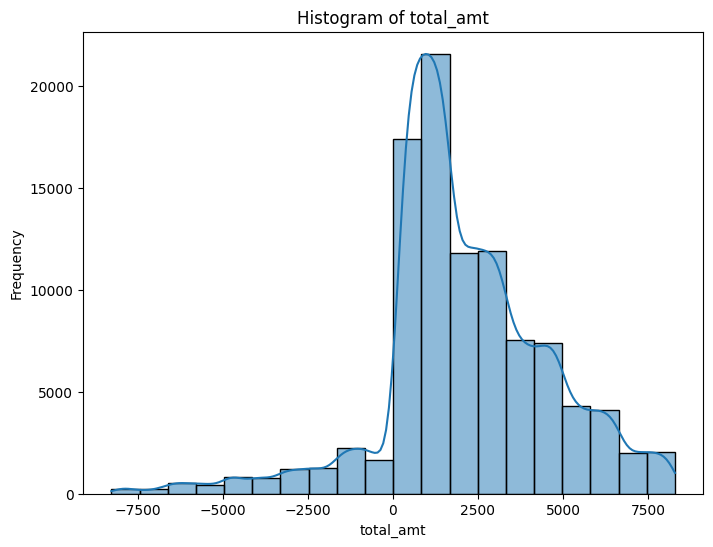

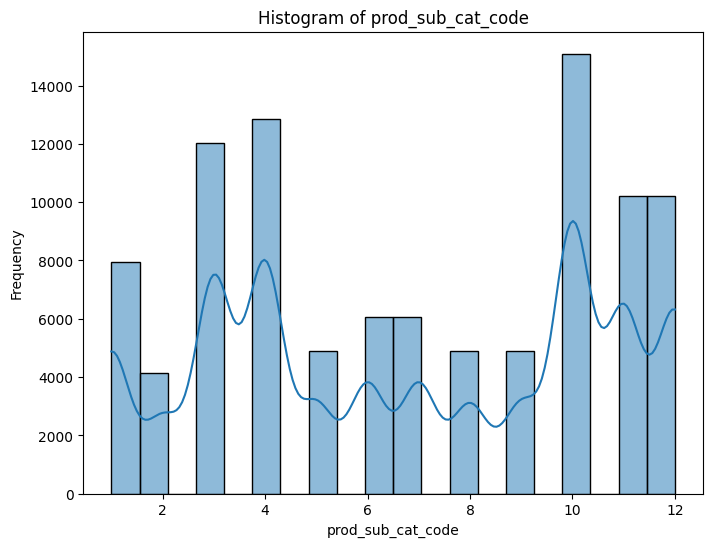

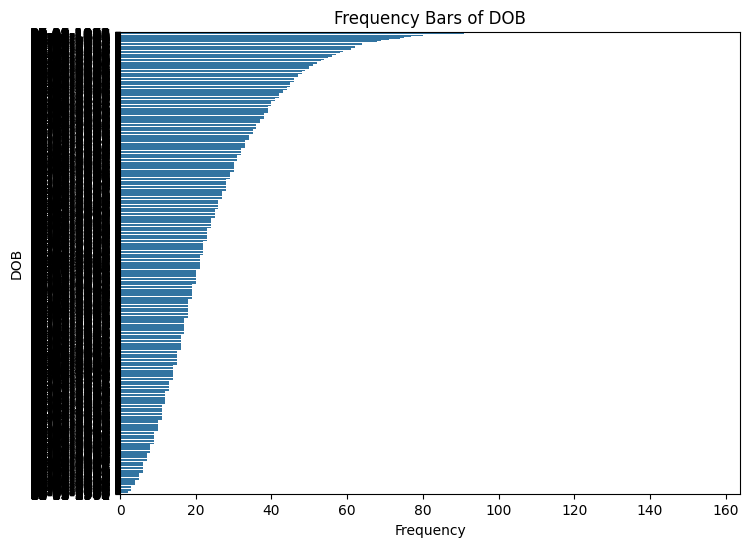

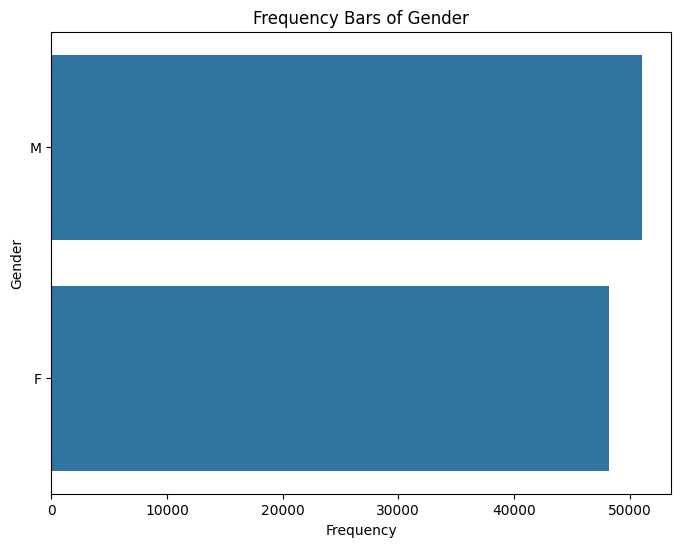

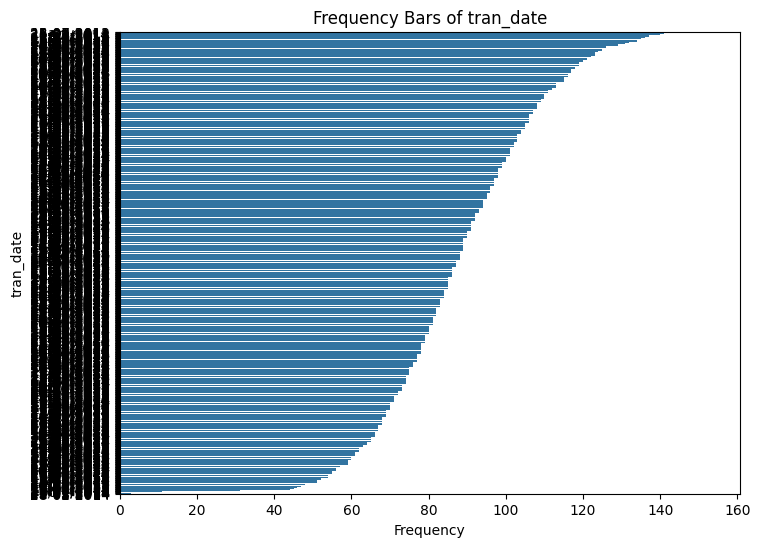

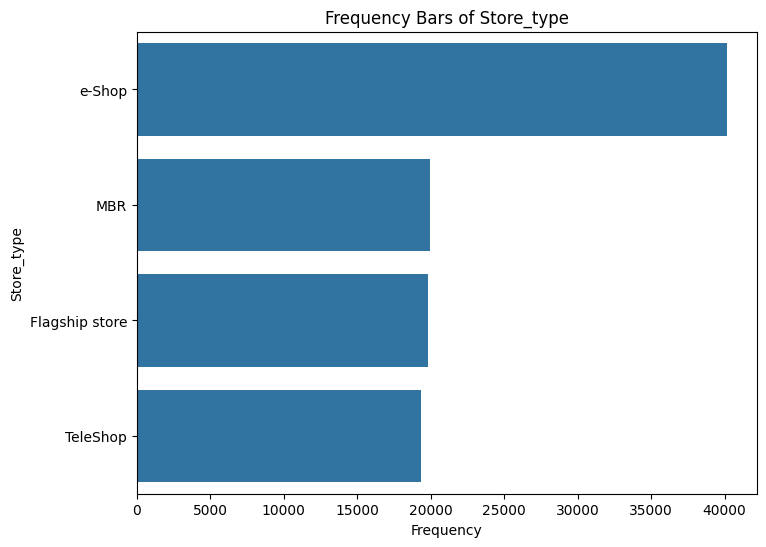

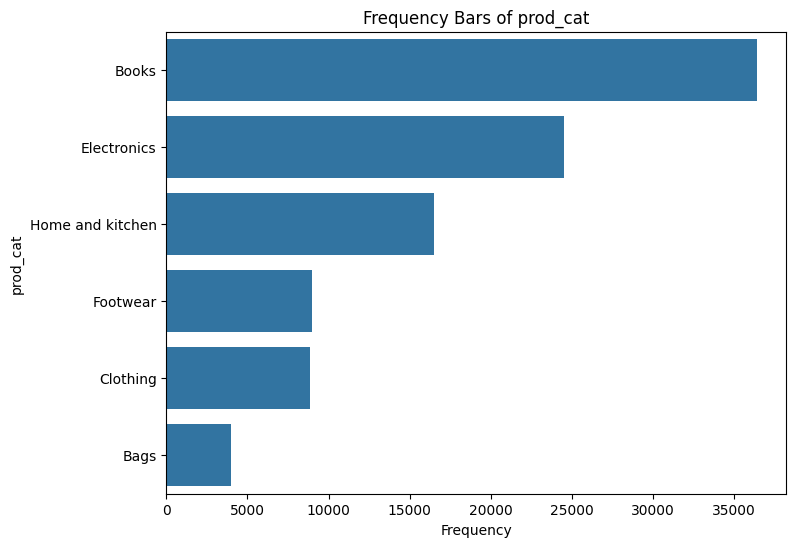

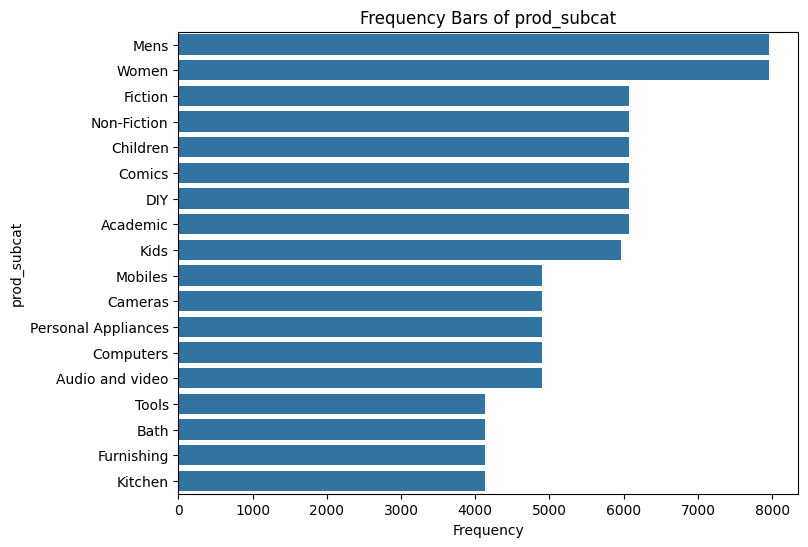

In [48]:
continuous_variables = customer_final_df.select_dtypes(include=['int64', 'float64'])
categorical_variables = customer_final_df.select_dtypes(include=['object'])

for column in continuous_variables.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(customer_final_df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in categorical_variables.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=column, data=customer_final_df, order=customer_final_df[column].value_counts().index)
    plt.title(f'Frequency Bars of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.show()


4. Calculate the following information using the merged dataset :\
   a. Time period of the available transaction data\
   b. Count of transactions where the total amount of transaction was negative

In [63]:
customer_final_df['tran_date'] = pd.to_datetime(customer_final_df['tran_date'],errors='coerce', format="%d-%m-%Y", dayfirst=True)
earliest_date = customer_final_df['tran_date'].min()
latest_date = customer_final_df['tran_date'].max()

print("Time period of available transaction data:")
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)


Time period of available transaction data:
Earliest Date: 2011-01-25 00:00:00
Latest Date: 2014-02-28 00:00:00


In [67]:
negative_transactions_count = customer_final_df[customer_final_df['total_amt'] < 0].shape[0]
print("Count of transactions where the total amount was negative:", negative_transactions_count)


Count of transactions where the total amount was negative: 9294


5. Analyze which product categories are more popular among females vs male customers

In [80]:
gender_product_category_counts = customer_final_df.groupby(['Gender', 'prod_cat']).size().unstack(fill_value=0)
gender_total_counts = customer_final_df['Gender'].value_counts()

gender_product_category_proportions = gender_product_category_counts.div(gender_total_counts, axis=0)
print("Proportion of transactions for each product category by gender:")
gender_product_category_proportions

Proportion of transactions for each product category by gender:


prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,0.041243,0.367080,0.089561,0.241484,0.095162,0.165470
M,0.039333,0.366222,0.089205,0.251709,0.086325,0.167205


6. Which City code has the maximum customers and what was the percentage of customers from
that city

In [82]:
city_customers_count = customer_final_df['city_code'].value_counts()
max_customers_city_code = city_customers_count.idxmax()
max_customers_count = city_customers_count.max()
percentage_max_customers = (max_customers_count / len(customer_final_df)) * 100

print("City code with the maximum customers:", max_customers_city_code)
print("Number of customers from that city:", max_customers_count)
print("Percentage of customers from that city: {:.2f}%".format(percentage_max_customers))


City code with the maximum customers: 4.0
Number of customers from that city: 10571
Percentage of customers from that city: 10.65%


7. . Which store type sells the maximum products by value and by quantity

In [86]:
store_type_stats = customer_final_df.groupby('Store_type').agg({'Qty': 'sum', 'total_amt': 'sum'})
max_value_store_type = store_type_stats['total_amt'].idxmax()
max_value = store_type_stats.loc[max_value_store_type, 'total_amt']

max_quantity_store_type = store_type_stats['Qty'].idxmax()
max_quantity = store_type_stats.loc[max_quantity_store_type, 'Qty']

print("Store type that sells the maximum products by value:", max_value_store_type)
print("Total value of products sold by this store type:", max_value)
print("\nStore type that sells the maximum products by quantity:", max_quantity_store_type)
print("Total quantity of products sold by this store type:", max_quantity)


Store type that sells the maximum products by value: e-Shop
Total value of products sold by this store type: 85915747.84

Store type that sells the maximum products by quantity: e-Shop
Total quantity of products sold by this store type: 98447


8.  What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?

In [88]:
flagship_transactions = customer_final_df[(customer_final_df['Store_type'] == 'Flagship store') & 
                                           (customer_final_df['prod_cat'].isin(['Electronics', 'Clothing']))]

total_amount_earned = flagship_transactions['total_amt'].sum()

print("Total amount earned from 'Electronics' and 'Clothing' categories from Flagship Stores:", total_amount_earned)


Total amount earned from 'Electronics' and 'Clothing' categories from Flagship Stores: 14658949.89


9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [90]:
total_amount_earned2=Customer_Final_df[(Customer_Final_df['Gender']=='M') | (customer_Final_df['prod_cat'].isin(['Electronics']))]
total_amount_earned3=total_amount_earned2['total_amt'].sum()
total_amount_earned3


Total amount earned from 'Male' customers under the 'Electronics' category: 0.0


10.  How many customers have more than 10 unique transactions, after removing all transactions
which have any negative amounts?

In [93]:
non_negative_transactions = customer_final_df[customer_final_df['total_amt'] >= 0]

unique_transactions_per_customer = non_negative_transactions.groupby('customer_Id')['transaction_id'].nunique()

customers_more_than_10_transactions = unique_transactions_per_customer[unique_transactions_per_customer > 10]

num_customers_more_than_10_transactions = len(customers_more_than_10_transactions)

print("Number of customers with more than 10 unique transactions after removing transactions with negative amounts:", num_customers_more_than_10_transactions)


Number of customers with more than 10 unique transactions after removing transactions with negative amounts: 6


11. For all customers aged between 25 - 35, find out:\
    a. What was the total amount spent for “Electronics” and “Books” product categories?\
    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [97]:
customer_final_df['DOB'] = pd.to_datetime(customer_final_df['DOB'], format="%d-%m-%Y")
customer_final_df['Age'] = (pd.Timestamp.now() - customer_final_df['DOB']).dt.days//365
customers_25_to_35 = customer_final_df[(customer_final_df['Age'] >= 25) & (customer_final_df['Age'] <= 35)]
electronics_books_transactions = customers_25_to_35[customers_25_to_35['prod_cat'].isin(['Electronics', 'Books'])]

total_amount_spent = electronics_books_transactions['total_amt'].sum()

print("Total amount spent for 'Electronics' and 'Books' product categories by customers aged between 25 - 35:", total_amount_spent)


Total amount spent for 'Electronics' and 'Books' product categories by customers aged between 25 - 35: 24944760.62


In [99]:
customer_final_df['DOB'] = pd.to_datetime(customer_final_df['DOB'])
customer_final_df['Age'] = (pd.Timestamp.now() - customer_final_df['DOB']).dt.days // 365

customers_25_to_35 = customer_final_df[(customer_final_df['Age'] >= 25) & (customer_final_df['Age'] <= 35)]

transactions_between_dates = customers_25_to_35[(customers_25_to_35['tran_date'] >= '2014-01-01') & 
                                                 (customers_25_to_35['tran_date'] <= '2014-03-01')]

total_amount_spent = transactions_between_dates['total_amt'].sum()
print("Total amount spent by customers aged between 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014:", total_amount_spent)


Total amount spent by customers aged between 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014: 1179736.6749999998
